# <center>**The Perceptron**

![perceptron](https://letscode-academy.com/blog/wp-content/uploads/2019/07/perceptron-01-250x234.png)

 # <center>Learning a linear function</center>
 ## We want to fit a perceptron to the function $y = 45*x + 23$
 First we need to generate a dataset

 Let x be a vector of 1000 random numbers:

```
import numpy as np

size = 1000
x = np.random(1, size)

```

let y the labels of each x entry:
```
y = 45*x + 23
```
Note: the code in the cell adds noise to the labels based on a gaussian distribution with 5 as mean and 5 as variance (it can be modified to better visualization) Now we have an 1000 sized labeled dataset. We need to split it into train, validation and test. The portion for each set will be considered as used in the literarture (70%, 15%, 15%).

```
training = x[:700]
validation = x[700:850]
test = x[850:]
```

Now we can fit the perceptron
```
fit(dataset, weights)
```

In [0]:
import numpy as np
import random
import time
import sklearn
import matplotlib.pyplot as plt
from random import shuffle

# Defining the perceptron

In [0]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def perceptron(inputs, weights):
    inputs_bias = np.append(inputs,1)
    output = np.dot(inputs_bias.T, weights)
    return output

In [0]:
def init(size):
  weights = (np.random.rand(1,size) - 0.5)[0]
  bias = (np.random.rand(1) - 0.5) 
  weights = np.append(weights, bias) 
  return weights


In [0]:
size = 1000
x = np.random.rand(size)

In [0]:
#@title Adding random noise to the function will be learned
y = 45*x + 23 + np.random.rand(size)*10


In [0]:
training = x[:700]
validation = x[700:850]
test = x[850:]

In [0]:
dataset =[]
for  i,x_ in enumerate(training):
  dataset.append((x_, y[i]))


#Training with Gradient Descent given batch_size = Training set, batch_size = 1 and batch_size = num

# Fitting the model

The weights' update function can be calculated as:<br>
<center>$\begin{equation}\Delta w_{i} =  - \eta.\nabla_{w}^E\end{equation}$</center> 

where $\nabla_{w}^E$ is the gradient function of the error function over the weights. Assuming that each weight is linearly independent, we can rewrite this equation as:<br>
let $\textbf{w}$ be a vector of weights and $\nabla_{\textbf{w}}^E$ a vector of partial devarivatives of the Error function over the weights:

$\begin{equation}
  \textbf{w} = \begin{pmatrix} w_{1} \\ w_{2} \\ \vdots \\ w_{n} \end{pmatrix} ; \nabla_{\textbf{w}}^E = \begin{pmatrix} \frac{\partial E}{\partial w_{1}} \\ \frac{\partial E}{\partial w_{2}}\\ \vdots \\ \frac{\partial E}{\partial w_{n}}\end{pmatrix} \end{equation}
  $

  $\textbf{w}_{t+1} = \textbf{w}_{t} - \eta.\nabla_{\textbf{w}}^E$

We assume the Error function to be the Mean Square Error. Therefore, it can be calculated by the following equation:

$\mathcal{L}(y, \hat{y}) = \frac{1}{N}\sum_{i = 0}^N (y - \hat{y})^2$

lines `27` and `34` of the next cell are the implementation of the error function $\mathcal{L}$ and weights' updating  $\textbf{w}_{t+1} = \textbf{w}_{t} - \eta.\nabla_{\textbf{w}}^E$ , respectively.

In [0]:
# Inicialização
import matplotlib.pyplot as plt
from IPython.display import clear_output
from time import sleep

def fit(dataset, weights, epochs, neta = 0.00001, batch_size = 1):
  loss_plot = []
  acc = []
  
  if batch_size == 'dataset':
    batch_size = len(dataset)- 1

  update_weights = batch_size 

  for i, epoch in enumerate(range(epochs)):
  
    loss_sum = 0
    dLoss = np.empty(2)

    shuffle(dataset)
    batch_counter = 0
    for input_value, output_gt in dataset:
      batch_counter += 1

      out = perceptron(input_value, weights)
      
      loss = ((output_gt - out)**2)/(2*len(dataset)) #MSE loss
      
      loss_sum += loss

      dLoss += (output_gt - out)*(-np.append(input_value, 1))

      if batch_counter == update_weights:
        weights -= neta*(dLoss/batch_counter) # Dwi = -neta*wb*loss_sum
        dLoss = 0
        batch_counter = 0
        
       

    if (i % (epochs*0.1)) == 0:
    
      x_ = validation
      y_ = weights[0]*x_ + weights[1]
      sleep(1)
      clear_output(wait = True)
      plt.plot(np.sort(x_), np.sort(y_))
      
      y_ = y[700:850]
      print(weights)
      plt.plot(np.sort(x_), np.sort(y_), 'bo')
      plt.show()

    loss_plot.append(loss_sum)

  plt.plot(loss_plot )
  plt.show()
    

#Weights initialization 

In [0]:
#@title The function Init() waits for a dimension value (how many weights the model will have)
weights = init(x.ndim)

[42.78148555 29.12214288]


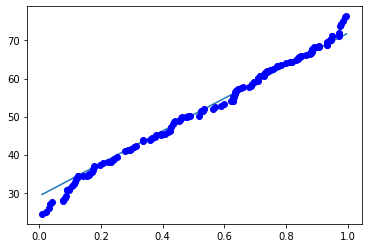

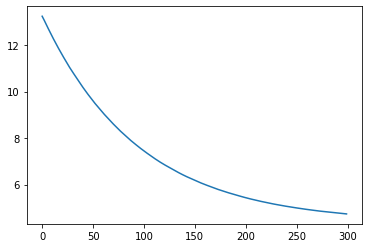

----------Time:17.092875480651855----------


In [27]:
t1 = time.time()
print(weights)
epochs  = 300 #@param
neta = 1e-2 #@param
batch_size = 100 #@param
fit(dataset = dataset, weights = weights, epochs = epochs,
    neta = neta, batch_size = batch_size)
t2 = time.time()

print(10*'-' + "Time:" + str(t2 - t1) + 10*'-')

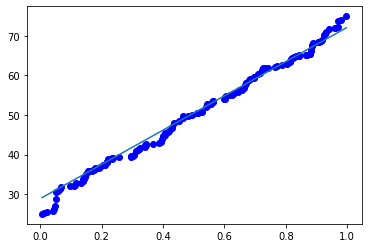

0.9536757277978617


In [28]:
# Avalie o modelo treinado aqui
# Como a acurácia no conjunto de teste se compara com a acurácia obtida no conjunto de treino?
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score

y_true = y[850:]
y_pred = weights[0]*test + weights[1]


plt.plot(np.sort(test),np.sort(y_true), 'bo')
plt.plot(np.sort(test),np.sort(y_pred))
plt.show()
print(r2_score(y_true, y_pred))
#evaluate(weights,linear_dataset_test)
  
  

#The cells above show how to fit a perceptron as a regressor. Next, we will fit the perceptron as a classifier. So we don't want to predict where a new entry would most likely be in a linear behavior, but we do want to discriminate to which class this entry belongs.

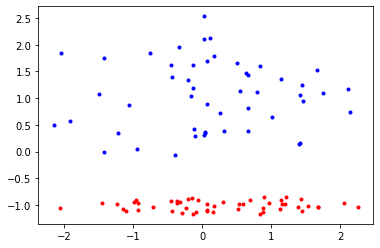

In [0]:
#@title This cell creates a linearly separable dataset of two features
from sklearn import datasets

separable = False
while not separable:
    samples = datasets.make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, flip_y=-1)
    red = samples[0][samples[1] == 0]
    blue = samples[0][samples[1] == 1]
    separable = any([red[:, k].max() < blue[:, k].min() or red[:, k].min() > blue[:, k].max() for k in range(2)])
plt.plot(red[:, 0], red[:, 1], 'r.')
plt.plot(blue[:, 0], blue[:, 1], 'b.')
plt.show()

#Training a classifier

In [0]:
#@title Now the perceptron uses an activation function called sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))

def perceptron(inputs, weights):
    # Defina o perceptron aqui
    inputs_bias = np.append(inputs,1)
    output = np.dot(inputs_bias.T, weights)
    return sigmoid(output)

In [0]:
def fit(dataset, weights, epochs, batch_size = 1, neta = 0.00001):
  loss_plot = []
  acc = []

  if batch_size == 'dataset':
    batch_size = len(dataset)- 1

  update_weights = batch_size

  for i, epoch in enumerate(range(epochs)):
    
    loss_sum = 0
    acc_sum = 0
    dLoss = 0
    batch_counter = 0
    for input_value, output_gt in dataset:
      
      batch_counter += 1

      out = perceptron(input_value, weights)
      
      loss = ((output_gt - out)**2)/(2*len(dataset)) #MSE loss
      
      loss_sum += loss

      dLoss += (output_gt - out)*(-np.append(input_value, 1))
      if (out < 0.5 and output_gt > 0.5) or (out > 0.5 and output_gt < 0.5):
        pass
      else:
          acc_sum += 1
      if batch_counter == update_weights:
       
        
        weights -= neta*(dLoss/batch_counter)
    
        dLoss = 0
        batch_counter = 0
    
    acc.append(acc_sum/len(dataset))
  
    loss_plot.append(loss_sum)
    if (epoch % 100) == 0:
      evaluate(weights, dataset)

  fig, ax1 = plt.subplots()

  ax2 = ax1.twinx()

  color = 'tab:blue'
  ax2.set_ylabel('accuracy', color=color)  # we already handled the x-label with ax1
  ax2.plot(acc, color=color)

  color = 'tab:red'
  ax1.set_ylabel('loss', color=color)  # we already handled the x-label with ax1
  ax1.plot(loss_plot, color=color)
  fig.tight_layout()
  plt.show()
    

In [0]:
from sklearn import metrics as mtr

def evaluate(weights,dataset):

    y_hat = []
    for img,label in dataset:
        # Defina a métrica de avaliação do perceptron aqui (e.g. acurácia)
        y = perceptron(img, weights)
        
        if y > 0.5:
          y_hat.append(1) 
         
        else:
          y_hat.append(0)
          
        
    print(mtr.classification_report([y_true for _, y_true in dataset], y_hat ))
        
    
    

              precision    recall  f1-score   support

           0       0.06      0.04      0.05        50
           1       0.25      0.32      0.28        50

    accuracy                           0.18       100
   macro avg       0.15      0.18      0.16       100
weighted avg       0.15      0.18      0.16       100

              precision    recall  f1-score   support

           0       0.63      0.38      0.48        50
           1       0.56      0.78      0.65        50

    accuracy                           0.58       100
   macro avg       0.60      0.58      0.56       100
weighted avg       0.60      0.58      0.56       100

              precision    recall  f1-score   support

           0       0.93      0.80      0.86        50
           1       0.82      0.94      0.88        50

    accuracy                           0.87       100
   macro avg       0.88      0.87      0.87       100
weighted avg       0.88      0.87      0.87       100

              preci

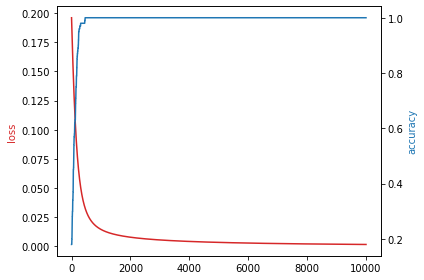

In [0]:
from random import shuffle

weights = init(2)

inputs = samples[0][:]
labels = samples[1][:]

dataset = [(inp, labels[i]) for i,inp in enumerate(inputs)]

shuffle(dataset)
fit(dataset,weights, 10000, neta = 1e-4)

[-0.24306467  4.7910317   1.01550893]


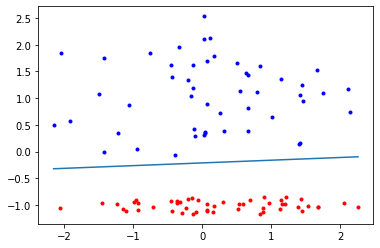

In [0]:
#@title Seeing the learned surface projected on the feature space
print(weights)
x = np.linspace(min((red[:,0].min(),blue[:,0].min())),max(red[:,0].max(),blue[:,0].max()), num = 100)
y = -(x*weights[0] + weights[2])/weights[1]
plt.plot(x, y)
plt.plot(red[:, 0], red[:, 1], 'r.')
plt.plot(blue[:, 0], blue[:, 1], 'b.')
plt.show()

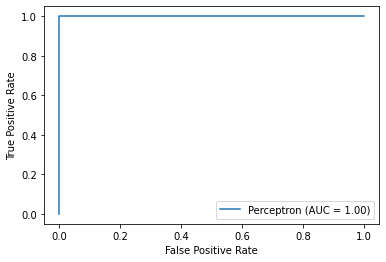

In [0]:
#@title Let's instantiate a Perceptron object from sklearn framework and compare it against ours
from sklearn.linear_model import Perceptron
from sklearn.metrics import plot_roc_curve
neuron = Perceptron()
neuron.fit(samples[0], samples[1])
disp = plot_roc_curve(neuron, samples[0], samples[1])
plt.show()

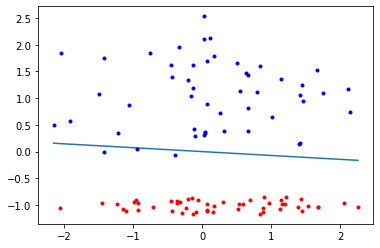

In [0]:
x = np.linspace(min((red[:,0].min(),blue[:,0].min())),max(red[:,0].max(),blue[:,0].max()), num = 100)
y = -(x*neuron.coef_[0][0] + 0)/neuron.coef_[0][1]
plt.plot(x, y)
plt.plot(red[:, 0], red[:, 1], 'r.')
plt.plot(blue[:, 0], blue[:, 1], 'b.')
plt.show()

# Going Further in Deep Learning


These initial cells were an introduction to what deep learning can really be. We saw how to fit the perceptron as a regressor and as a classifier, but in a special case where the data follow a good patterned behavior - we fitted a linear function with some noise added and classified a linearly separable dataset. Often, in real problems, we face multidimensional data, thereby the difficulty in finding patterns is enhanced and the spatial distribution of the data turns unseeable and noisy. We will see in the next colab notebook (MLP) by adding hierarchical layers of neurons, the model will learn how to map the initial representation of the data into another, allowing multiclass learning and improving the model's accuracy.
In the following cells, we will keep the idea of training a single perceptron to classify two classes, but we will see how it performs in a real image dataset called CIFAR10.

#**CIFAR 10**
is a dataset composed of 50000 image samples of 10 stratified classes for the training set and 100000 image samples of 10 stratified classes for the testing set. We can see bellow how this dataset looks like.
![cifar 10](https://cdn-images-1.medium.com/max/700/1*83CuvBlu2iosnewOQSeiPg.jpeg)
<br>
We will group 6 classes into one and 4 into another, thereby we can fit a perceptron to learn a binary classification over the dataset.

In [0]:
%matplotlib inline

import torch #@markdown Torch is a deeplearning framework mainly developed by Facebook AI Researchers
import torchvision #@markdown torchvision is a collection of datasets and models we can use as much to evaluate our knowledge in Deep Learning as to avail it in our projects
import numpy as np

np.seterr(all='raise')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [0]:
# Carregar os datasets

dataset_train = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True)

dataset_test = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True)

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [0]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [0]:
print(len(dataset_train), len(dataset_test))

50000 10000


In [0]:
# greyscale transformation

# Train
grayscale_dataset_train = []
for img,label in dataset_train:
    category = classes[label]
    gray_npimg = np.array(img.convert('L'))
    grayscale_dataset_train.append((gray_npimg,category))
    
# Test
grayscale_dataset_test = []
for img,label in dataset_test:
    category = classes[label]
    gray_npimg = np.array(img.convert('L'))
    grayscale_dataset_test.append((gray_npimg,category))    

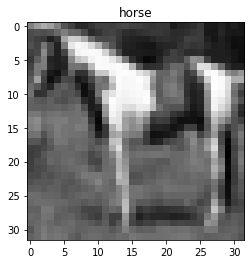

In [0]:
#@title Selecting an image

# Mostrar uma imagem

import matplotlib.pyplot as plt
import numpy as np

image_index = 4024 #@param {type:"slider", min:0, max:10000, step:1}
label = grayscale_dataset_train[image_index][1]
npimg = grayscale_dataset_train[image_index][0]

plt.imshow(npimg, cmap='gray')
plt.title(label)
plt.show()

In [0]:
# rectifing the image

# the division by 255 is a normalization

linear_dataset_train = []
target_labels = ('plane', 'car', 'ship', 'truck')
for img,category in grayscale_dataset_train:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_train.append((linear_img,label))
    
linear_dataset_test = []
target_labels = ('plane', 'car', 'ship', 'truck')
for img,category in grayscale_dataset_test:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_test.append((linear_img,label))    

In [0]:
size = len(linear_dataset_train[0][0])
print(size)

1024


#Redefing the perceptron

In [0]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def perceptron(inputs, weights):

    inputs_bias = np.append(inputs,1)
    output = np.dot(inputs_bias.T, weights)
    return sigmoid(output)



#Training the perceptron

In [0]:
def fit(dataset, weights, epochs, batch_size = 1, neta = 0.00001):
  loss_plot = []
  acc = []

  if batch_size == 'dataset':
    batch_size = len(dataset)- 1

  update_weights = batch_size

  for i, epoch in enumerate(range(epochs)):
    
    loss_sum = 0
    acc_sum = 0
    dLoss = 0
    batch_counter = 0
    for input_value, output_gt in dataset['train']:
      
      batch_counter += 1

      out = perceptron(input_value, weights)
      
      loss = ((output_gt - out)**2)/(2*len(dataset)) #MSE loss
      
      loss_sum += loss

      dLoss += (output_gt - out)*(-np.append(input_value, 1))

      if (out < 0.5 and output_gt > 0.5) or (out > 0.5 and output_gt < 0.5):
        pass
      else:
        acc_sum += 1

      if batch_counter == update_weights:
       
        #if (out < 0.5 and output_gt > 0.5) or (out > 0.5 and output_gt < 0.5):
        weights -= neta*(dLoss/batch_counter) # Dwi = -neta*wb*loss_sum
     
        dLoss = 0
        batch_counter = 0

    acc.append(acc_sum/len(dataset['train']))
  
    loss_plot.append(loss_sum)
    if (epoch % 100) == 0:
     # plt.plot(loss_plot)
     # plt.show()
      evaluate(weights, dataset['val'])


  fig, ax1 = plt.subplots()

  ax2 = ax1.twinx()

  color = 'tab:blue'
  ax2.set_ylabel('accuracy', color=color) 
  ax2.plot(acc, color=color)

  color = 'tab:red'
  ax1.set_ylabel('loss', color=color)
  ax1.plot(loss_plot, color=color)
  fig.tight_layout()
  plt.show()

In [0]:
from sklearn import metrics as mtr

def evaluate(weights,dataset):
    i = 0
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    y_hat = []
    for img,label in dataset:
        # Defina a métrica de avaliação do perceptron aqui (e.g. acurácia)
        y = perceptron(img, weights)
        
        if y > 0.5:
          y_hat.append(1) 
         
        else:
          y_hat.append(0)
          
    
    print(mtr.classification_report([y_true for _, y_true in dataset], y_hat ))
    return y_hat    
    
    

In [0]:
from random import shuffle 

shuffle(linear_dataset_train)
shuffle(linear_dataset_test)
weights = init(32*32)
t1 = time.time()
lr = 1e-4 #@param
epochs = 1000 #@param
size_train = 5000 #@param
size_val = 3000#@param
batch_size = 100 #@param
fit({'train': linear_dataset_train[:size_train], 'val': linear_dataset_test[:size_val]}, weights, epochs, batch_size = batch_size, neta = lr)
t2 = time.time()
print("{} seconds to fit".format(t2 - t1))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71      6000
           1       0.56      0.54      0.55      4000

    accuracy                           0.64     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.64      0.64      0.64     10000



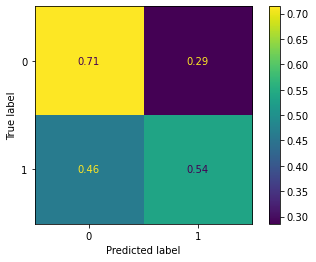

In [0]:
# Caso queiram plotar alguma coisa

import matplotlib.pyplot as plt
yhat = evaluate(weights, linear_dataset_test)
#plt.plot(accuracies)
cm = mtr.confusion_matrix([x for _, x in linear_dataset_test],yhat,normalize = 'true')
mtr.ConfusionMatrixDisplay(cm, np.array((0,1)), ).plot()


# Using the sklearn's built-in percepton 

In [0]:
clf_cifar = Perceptron(random_state= 3)

X = [X.squeeze(1) for X,_ in linear_dataset_train]
print(X[0])
y = [y for _, y in linear_dataset_train]
print(y[0])

clf_cifar.fit(X,y )

[0.45490196 0.47058824 0.37647059 ... 0.58823529 0.58039216 0.57254902]
1


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=3, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

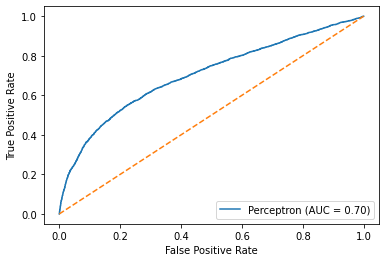

In [0]:
X = [X.squeeze(1) for X,_ in linear_dataset_test]
y = [y for _, y in linear_dataset_test]
plot_roc_curve(clf_cifar, X, y)
plt.plot([0, 1], [0, 1], '--')

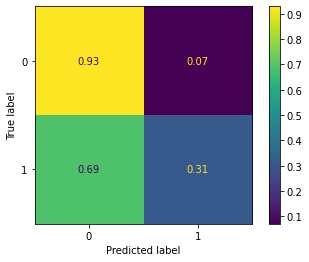

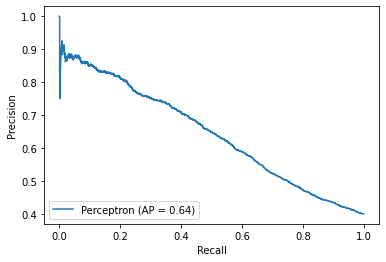

In [0]:
mtr.plot_confusion_matrix(clf_cifar, X, y, normalize = 'true')
mtr.plot_precision_recall_curve(clf_cifar, X, y)

# Classifying individual classes 

code here the needed assess and training process modifications in order to classify each class individualy.

- General idea: train a perceptron by class(positive samples = class samples; negative samples = the other classes samples)
Put a softmax layer at the top of the 10 neurons, train them realitve to softmax outcome, select the highest probability 

In [0]:
!pip install skorch

     |████████████████████████████████| 112kB 5.2MB/s 


# A merge of torch and sklearn framework called Skorch

If you looking to improve your knowledge in the development of AI models, this library merges the best of the two worlds

In [0]:
import skorch


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
